# Emissie-reducties 

## benodigd in NL om te voldoen aan de verplichtingen volgend uit het klimaatakkoord van Parijs

Uitgangspunt voor dit notebook zijn de totale hoeveelheid emissies, dus niet alleen CO2 maar ook CH4, F-gassen etc. aangezien deze ook bijdragen aan het broeikaseffect. De belangrijkste bron hierbij zijn de tabellen van de Emissieregistratie : http://www.emissieregistratie.nl/erpubliek/erpub/international/broeikasgassen.aspx



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
"""
Bron voor NL emissies: 
    http://www.emissieregistratie.nl/erpubliek/erpub/international/broeikasgassen.aspx
"""

emis_NL_1990 = 221.7 # Mton CO2-eq, excl. LULUCF
emis_NL_2017 = 193.7 # Mton CO2-eq

In [4]:
print('reductie in 2017 t.o.v. 1990')
print('{:.2f} %'.format((1.0 - emis_NL_2017 / emis_NL_1990)*100))

reductie in 2017 t.o.v. 1990
12.63 %


Ter referentie, het 4e kabinet Balkenende uit 2007 had als doelstelling in het regeerakkoord had opgenomen om de totale emissies in 2020 gereduceerd te hebben met 30% t.o.v. 1990

Bron: NRC (https://outline.com/8MyPLN)

Deze doelstelling is door latere kabinetten losgelaten. Het Urgenda-vonnis eist alsnog 25% reductie door de staat. 

Bron: https://www.rijksoverheid.nl/actueel/nieuws/2020/04/24/kabinet-neemt-maatregelen-voor-extra-co2-reductie

In [5]:
"""
Bronnen
    https://en.wikipedia.org/wiki/Netherlands
    https://en.wikipedia.org/wiki/World_population
"""
inwoners_NL = 17.4e6 # 1-1-2019
inwoners_wereld = 7.8e9 # maart 2020

inwoners_NL_frac_wereld = inwoners_NL / inwoners_wereld 

print('percentage wereldbevolking: {:.2f} %'.format(inwoners_NL_frac_wereld*100))

percentage wereldbevolking: 0.22 %


In [6]:
"""
Koolstofbudget om 67% kans te hebben om op 1,75 graden uit te komen
d.w.z. om te voldoen Klimaatakkoord Parijs "ruim onder 2 graden"

Bron
    https://scilogs.spektrum.de/klimalounge/wie-viel-co2-kann-deutschland-noch-ausstossen/
"""
world_budget_2018 = 800 * 1e9/1e6 # Gt to Mton
correction_2020 = 80  *  1e9/1e6 # Gt to Mton

world_budget_2020 = world_budget_2018 - correction_2020
world_budget_2020, 'Mton'

(720000.0, 'Mton')

In [7]:
budget_NL = inwoners_NL_frac_wereld * world_budget_2020
budget_NL, 'Mton'

(1606.153846153846, 'Mton')

In [8]:
# Met huidige emissies, na hoeveel jaren is het budget op? 
budget_NL / emis_NL_2017

8.291966164965649

## Voorgenomen beleid (klimaatwet)
In de klimaatwet is vastgelegd dat emissies in 2030 met 49% worden gereduceerd, en in 2050 met 95%

Bron: https://www.energienieuws.info/2019/05/klimaatwet-aangenomen.html

Met een lineaire daling ziet dat er zo uit: 

In [9]:
# AANNAME 1: het 2020 doel van Urgenda wordt gehaald
emis_NL_2020 = 0.75 * emis_NL_1990
emis_NL_2030 = 0.51 * emis_NL_1990
emis_NL_2050 = 0.05 * emis_NL_1990

In [10]:
emis_NL_2020, emis_NL_2030, emis_NL_2050

(166.27499999999998, 113.067, 11.085)

In [13]:
def emissies_2020s(jaar):
    daling_per_jaar = (emis_NL_2020 - emis_NL_2030) / 10
    return emis_NL_2020 - daling_per_jaar * (jaar-2020)

assert(np.isclose(emissies_2020s(2020), emis_NL_2020))
assert(np.isclose(emissies_2020s(2030), emis_NL_2030))

In [14]:
def emissies_2030s_2040s(jaar):
    daling_per_jaar = (emis_NL_2030 - emis_NL_2050) / 20
    return emis_NL_2030 - daling_per_jaar * (jaar-2030)

assert(np.isclose(emissies_2030s_2040s(2030), emis_NL_2030))
assert(np.isclose(emissies_2030s_2040s(2050), emis_NL_2050))

In [15]:
years1 = np.arange(2020, 2031)
emissies1 = list(map(emissies_2020s, years1))

years2 = np.arange(2031, 2051)
emissies2 = list(map(emissies_2030s_2040s, years2))

Text(0, 0.5, 'Totaal emissies (Mton CO2-eq)')

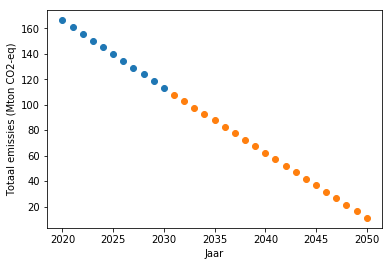

In [16]:
plt.plot(years1, emissies1, 'o')
plt.plot(years2, emissies2, 'o')
plt.xlabel('Jaar')
plt.ylabel('Totaal emissies (Mton CO2-eq)')

We tellen nu de emissies in alle jaren (2020-2050) bij elkaar op om tot een totaal te komen

In [17]:
np.sum(emissies1)  + np.sum(emissies2)

2726.91

In vergelijk, het NL budget als berekend als evenredig deel van het wereldbudget (0,22 %), dit is: 

In [18]:
budget_NL

1606.153846153846

Figuur van Twitter , van Stefan Rahmstorf volgens mij. Lineare emissie-afname is niet voldoende voor Parijs! 

![title](EX-nHuHWsAAfj9h.jpg)